In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

import configparser
config = configparser.ConfigParser()
config.read('config.ini')

#import wandb
#from wandb.keras import WandbCallback
#wandb.login()

#run = wandb.init(project="basic-nn-tensorflow", id="lr-scheduler-adam-bce-cos-deeper")
#wandb.config.update(config)

2.9.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


['config.ini']

In [2]:
data_path = 'Data/animals'

class_names = sorted(os.listdir(data_path))
num_classes = len(class_names)
print("Number of Classes:", num_classes)

class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)

print("Class Distribution:\n", dict(zip(class_names, class_sizes)))

Number of Classes: 10
Class Distribution:
 {'butterfly': 2112, 'cat': 1668, 'chicken': 3098, 'cow': 1866, 'dog': 4863, 'elephant': 1446, 'horse': 2623, 'sheep': 1820, 'spider': 4821, 'squirrel': 1862}


In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'Data/animals',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'Data/animals',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


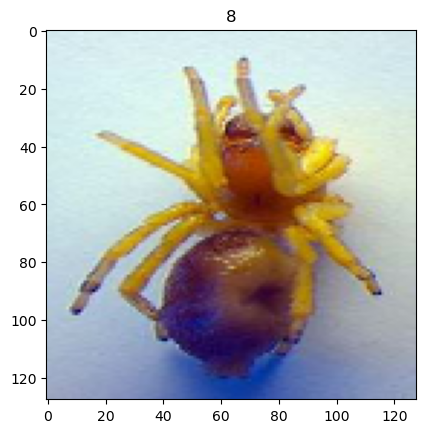

In [17]:
for images, labels in train_ds.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(labels[0].numpy())
    break

In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)       

In [21]:
model.fit(train_ds, validation_data=val_ds, epochs=config['default'].getint('epochs'))

Epoch 1/5


2023-04-03 21:10:05.497428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 21:10:06.141104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:06.465136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:07.733649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:07.913476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:08.691288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:09.171747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:09.844682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:10.130802: W ten

655/655 [==============================] - ETA: 0s - loss: 1.6652 - accuracy: 0.4237

2023-04-03 21:10:36.263894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 21:10:36.812342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:37.789830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:37.900823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:37.927951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 21:10:38.246712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 34s 38ms/step - loss: 1.6652 - accuracy: 0.4237 - val_loss: 1.3559 - val_accuracy: 0.5419
Epoch 2/5
655/655 [==============================] - 25s 38ms/step - loss: 1.2132 - accuracy: 0.5847 - val_loss: 1.1586 - val_accuracy: 0.6147
Epoch 3/5
655/655 [==============================] - 25s 37ms/step - loss: 0.9510 - accuracy: 0.6815 - val_loss: 1.0744 - val_accuracy: 0.6499
Epoch 4/5
655/655 [==============================] - 24s 37ms/step - loss: 0.7244 - accuracy: 0.7541 - val_loss: 1.0700 - val_accuracy: 0.6575
Epoch 5/5
655/655 [==============================] - 25s 37ms/step - loss: 0.5095 - accuracy: 0.8289 - val_loss: 1.1336 - val_accuracy: 0.6760


In [22]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.665154,0.423654,1.355852,0.541929
1,1.213229,0.584654,1.158626,0.614709
2,0.950954,0.681484,1.074411,0.649857
3,0.724384,0.754106,1.069992,0.657498
4,0.509540,0.828925,1.133626,0.676027


In [23]:
model.evaluate(val_ds)

164/164 [==============================] - 2s 15ms/step - loss: 1.1336 - accuracy: 0.6760


[1.1336263418197632, 0.6760267615318298]